In [ ]:
### Problema da Altura

Fulaninha de Tal quer arrumar um namorado, mas ela tem padrões muito específicos: se um rapaz quiser ser namorado de Fulaninha, ele tem que ser baixinho! Mas, afinal, a partir de que altura alguém é baixo?

+ Input (antecedente): valor da altura do rapaz

+ Output (consequente): valor da probabilidade de Fulaninha querer namorar o rapaz

+ Regras:
    * SE Altura for Short, ENTÃO Probabilidade é High
    * SE Altura for Medium, ENTÃO Probabilidade é Medium
    * SE Altura for Tall, ENTÃO Probabilidade é Low
    

In [88]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

#### Altura

In [97]:
#pegando 10 alturas aleatórias (m)
a = np.random.uniform(low=1.53, high=1.98, size=(10,))
a = a.round(decimals=2)

a

array([1.93, 1.92, 1.89, 1.67, 1.57, 1.71, 1.75, 1.66, 1.64, 1.57])

In [98]:
na = np.sort(a)

na

array([1.57, 1.57, 1.64, 1.66, 1.67, 1.71, 1.75, 1.89, 1.92, 1.93])

In [121]:
np.average(a).round(decimals=2)

1.73

In [125]:
altura = ctrl.Antecedent(na, 'altura')

In [126]:
#funções de pertencimento
altura['short'] = fuzz.trimf(altura.universe, [1.57, 1.57, 1.75])
altura['medium'] = fuzz.trimf(altura.universe, [1.57, 1.75, 1.93])
altura['tall'] = fuzz.trimf(altura.universe, [1.75, 1.93, 1.93])

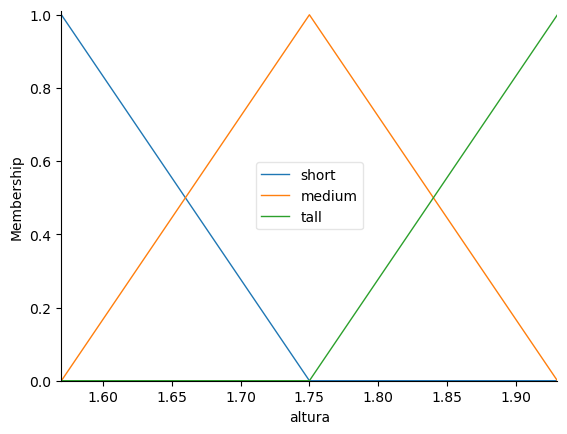

In [127]:
altura.view()

#### Probabilidade

In [103]:
prob = ctrl.Consequent(np.arange(0, 1.01, 0.01), 'probabilidade')

In [104]:
#funções de pertencimento
prob['low'] = fuzz.trimf(prob.universe, [0, 0, 0.5])
prob['medium'] = fuzz.trimf(prob.universe, [0, 0.5, 1])
prob['high'] = fuzz.trimf(prob.universe, [0.5, 1, 1])

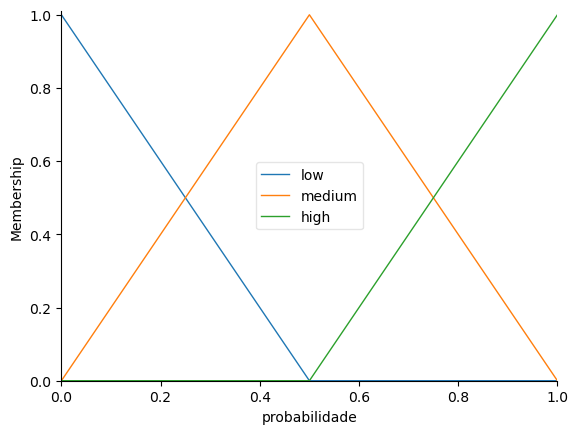

In [105]:
prob.view()

#### Resultados

In [128]:
#adaptando as regras
rule1 = ctrl.Rule(altura['tall'], prob['low'])
rule2 = ctrl.Rule(altura['medium'], prob['medium'])
rule3 = ctrl.Rule(altura['short'], prob['high'])

In [129]:
altura_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])

In [130]:
#criando variável para simulação
teste = ctrl.ControlSystemSimulation(altura_ctrl)

In [131]:
#escolhendo valor da altura do teste
teste.input['altura'] = 1.71

teste.compute()

0.51


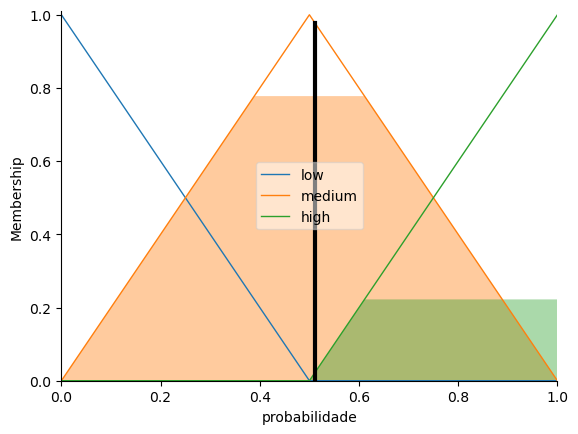

In [132]:
print(teste.output['probabilidade'].round(decimals=2))
prob.view(sim=teste)